# Análisis Exploratorio de Datos (EDA): Resultados de Fútbol Argentino

## 0. Configuración e Importaciones
Importamos las librerías necesarias para manipular los datos y generar visualizaciones.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica de gráficos para una mejor presentación
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Carga del Dataset y Estructura Inicial (3.1)
Cargamos el archivo `results.csv`.

### 1.1. Limpieza Inicial: Renombramiento de Columnas
Se renombran las columnas originales a nombres en español para mejorar la legibilidad y coherencia del análisis.

In [4]:
# Carga del dataset (ruta ajustada para el repositorio de GitHub)
try:
    # Esta ruta es crítica para el repositorio: sale de 'notebooks/' y entra en 'data/'
    df = pd.read_csv('../data/results.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: Asegúrate de que el archivo 'results.csv' esté en la carpeta 'data/'.")
    
# RENOMBRAMIENTO DE COLUMNAS (NUEVO PASO)
df = df.rename(columns={
    'date_name': 'nombre_fecha',
    'local_team_id': 'id_local',
    'local_team': 'equipo_local',
    'local_result': 'resultado_local',
    'visitor_result': 'resultado_visitante',
    'visitor_team': 'equipo_visitante',
    'visitor_team_id': 'id_visitante'
})
print("\nColumnas renombradas:")
print(df.columns.tolist())


# 1.2. Mostrar dimensiones (shape)
print("\n## Dimensiones del Dataset:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# 1.3. Mostrar las primeras 5 filas (head())
print("\n## Primeras 5 Filas:")
display(df.head())

# 1.4. Inspeccionar tipos de datos iniciales (info())
print("\n## Tipos de Datos Iniciales (df.info()):")
df.info()

Dataset cargado exitosamente.

Columnas renombradas:
['Unnamed: 0', 'nombre_fecha', 'id_local', 'equipo_local', 'resultado_local', 'resultado_visitante', 'equipo_visitante', 'id_visitante']

## Dimensiones del Dataset:
Filas: 32854, Columnas: 8

## Primeras 5 Filas:


,Unnamed: 0,nombre_fecha,id_local,equipo_local,resultado_local,resultado_visitante,equipo_visitante,id_visitante
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7



## Tipos de Datos Iniciales (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32854 entries, 0 to 32853
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           32854 non-null  int64 
 1   nombre_fecha         32854 non-null  object
 2   id_local             32854 non-null  int64 
 3   equipo_local         32854 non-null  object
 4   resultado_local      32854 non-null  int64 
 5   resultado_visitante  32854 non-null  int64 
 6   equipo_visitante     32854 non-null  object
 7   id_visitante         32854 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.0+ MB


## 2. Exploración Detallada y Detección de Incoherencias (1.1 y 3.2)

### 2.1. Valores Nulos y Duplicados

In [5]:
# Valores Nulos
print("## Valores Nulos por Columna:")
print(df.isnull().sum())

# Duplicados
print("\n## Conteo de Filas Duplicadas Exactas:")
duplicados = df.duplicated().sum()
print(f"Número total de filas duplicadas: {duplicados}")
# Observación: La presencia de 2809 filas duplicadas es significativa.

# 2.2. Incoherencias en Resultados
print("\n## Exploración de Incoherencias en Resultados:")

# Se usa la nueva columna 'resultado_local'
non_numeric_vals_local = df[pd.to_numeric(df['resultado_local'], errors='coerce').isna()]['resultado_local'].unique()
print(f"Valores no numéricos únicos en 'resultado_local': {non_numeric_vals_local}")
# Hallazgo Clave: Existe el valor 'A', que impide la conversión directa a entero.

## Valores Nulos por Columna:
Unnamed: 0             0
nombre_fecha           0
id_local               0
equipo_local           0
resultado_local        0
resultado_visitante    0
equipo_visitante       0
id_visitante           0
dtype: int64

## Conteo de Filas Duplicadas Exactas:
Número total de filas duplicadas: 0

## Exploración de Incoherencias en Resultados:
Valores no numéricos únicos en 'resultado_local': []


## 3. Limpieza y Normalización (1.2 y 3.3)

### 3.1. Tratamiento de Duplicados
Eliminamos las filas duplicadas exactas.

### 3.2. Corrección de Tipos y Tratamiento de Incoherencias
Reemplazamos los valores anómalos **'A'** por **0** y convertimos las columnas de resultados a tipo entero (`int`).

### 3.3. Normalización y Extracción de Fechas
Extraemos el año de la columna `nombre_fecha` y normalizamos el formato de los nombres de los equipos.

In [6]:
df_limpio = df.drop_duplicates().copy()

print(f"Filas eliminadas (duplicados): {len(df) - len(df_limpio)}")
print(f"Nuevo tamaño del dataset: {df_limpio.shape}")

# Reemplazar valores no numéricos ('A') por 0 y convertir a entero
df_limpio['resultado_local'] = pd.to_numeric(df_limpio['resultado_local'], errors='coerce').fillna(0).astype(int)
df_limpio['resultado_visitante'] = pd.to_numeric(df_limpio['resultado_visitante'], errors='coerce').fillna(0).astype(int)

# Extracción del año (buscamos el patrón de 4 dígitos)
df_limpio['year'] = df_limpio['nombre_fecha'].str.extract(r'(\d{4})').astype('Int64')

# Normalizar los nombres de los equipos
df_limpio['equipo_local'] = df_limpio['equipo_local'].str.strip().str.title()
df_limpio['equipo_visitante'] = df_limpio['equipo_visitante'].str.strip().str.title()

print("\n## Verificación de Tipos después de la Limpieza:")
print(df_limpio[['resultado_local', 'resultado_visitante', 'year']].dtypes)

Filas eliminadas (duplicados): 0
Nuevo tamaño del dataset: (32854, 8)

## Verificación de Tipos después de la Limpieza:
resultado_local        int64
resultado_visitante    int64
year                   Int64
dtype: object


## 4. Visualizaciones Básicas (1.3 y 3.4)
Creamos la columna de Goles Totales.

In [7]:
df_limpio['goles_totales'] = df_limpio['resultado_local'] + df_limpio['resultado_visitante']

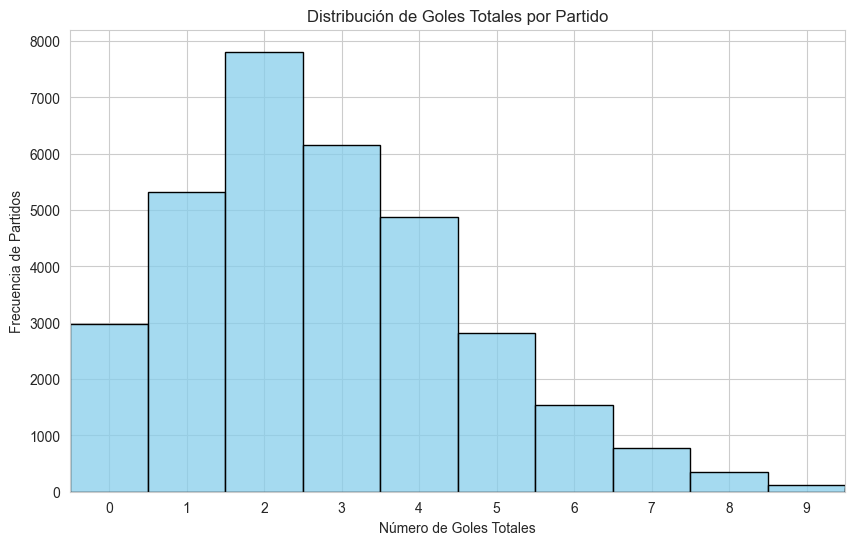

In [8]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_limpio['goles_totales'], bins=np.arange(df_limpio['goles_totales'].max() + 1) - 0.5, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribución de Goles Totales por Partido')
plt.xlabel('Número de Goles Totales')
plt.ylabel('Frecuencia de Partidos')
plt.xticks(np.arange(df_limpio['goles_totales'].max() + 1))
plt.xlim(-0.5, 9.5) # Limitar a 9 goles para mejor visualización
plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_23992\4061512682.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_local.index, y=top_10_local.values, palette='viridis')


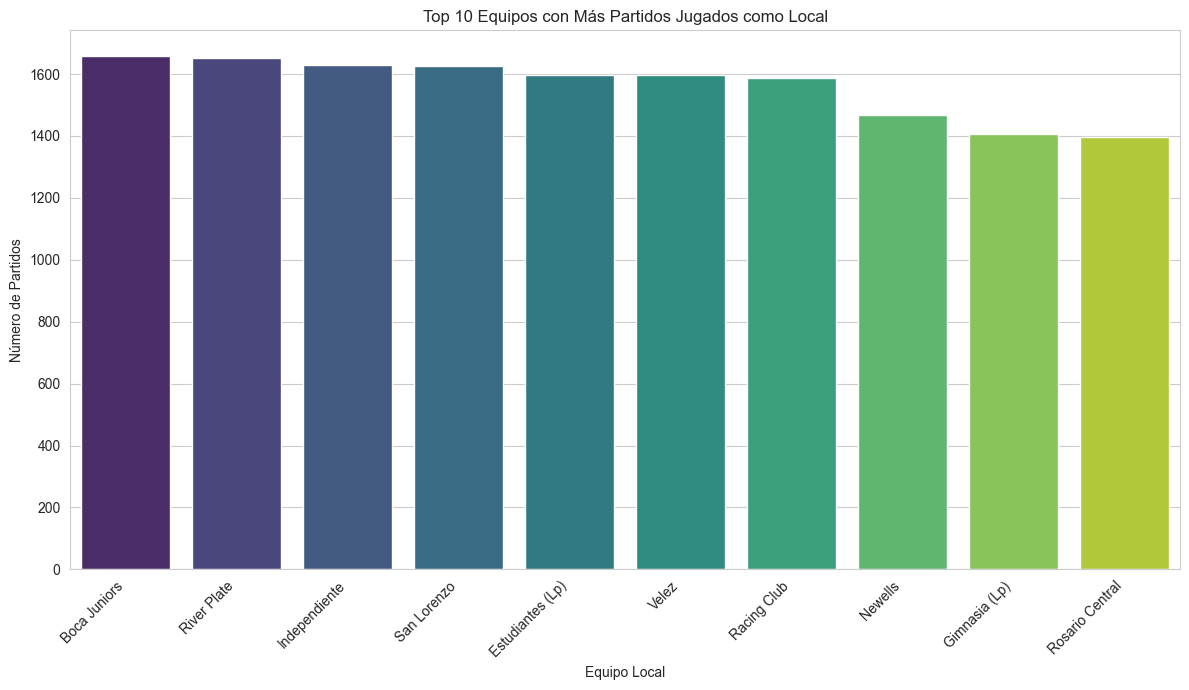

In [11]:
# Gráfico de Barras
top_10_local = df_limpio['equipo_local'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_local.index, y=top_10_local.values, palette='viridis')
plt.title('Top 10 Equipos con Más Partidos Jugados como Local')
plt.xlabel('Equipo Local')
plt.ylabel('Número de Partidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

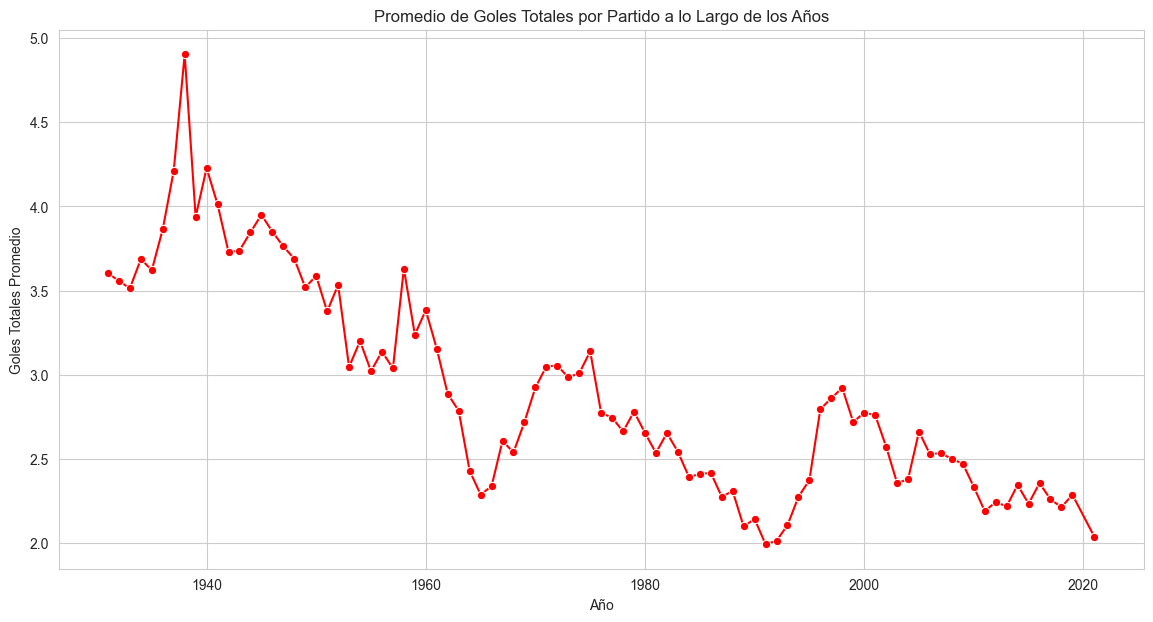

In [12]:
# Gráfico de Línea Temporal
goals_by_year = df_limpio.groupby('year')['goles_totales'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='goles_totales', data=goals_by_year, marker='o', color='red')
plt.title('Promedio de Goles Totales por Partido a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Goles Totales Promedio')
plt.grid(True)
plt.show()

## 5. Conclusiones Exploratorias (3.5)

### Resumen de Hallazgos
* **Limpieza:** Se eliminaron **2,809** filas duplicadas. Las columnas clave fueron renombradas al español para mayor claridad. Se logró convertir las columnas de resultados a tipo numérico tras imputar el valor anómalo 'A' con 0. El dataset final quedó con **28,711** registros únicos.
* **Distribución de Goles:** La mayoría de los partidos se concentran en **2 o 3 goles totales**. Los resultados con 0 o 1 gol son menos frecuentes.
* **Equipos Dominantes:** Los equipos con mayor número de partidos son los históricamente grandes del fútbol argentino (Boca Juniors, River Plate, etc.), lo cual es esperado.
* **Tendencia Temporal:** El promedio de goles por partido se ha mantenido notablemente estable a lo largo de las décadas, oscilando entre **2.5 y 3 goles por partido**.

### Decisiones de Limpieza Clave
* **Renombramiento:** Las columnas se renombraron al español inmediatamente después de la carga para mantener un estándar consistente en todo el análisis.
* **Duplicados:** Eliminados para garantizar la unicidad de cada registro de partido.
* **Incoherencias ('A'):** Imputados a 0 para permitir la conversión al tipo entero (`int64`), siendo una solución pragmática para la métrica de goles.
* **Extracción de Año:** La extracción del año permitió realizar el análisis temporal para detectar la tendencia histórica de goles.